In [25]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [27]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [28]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [29]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"]])

In [30]:
# Create a DataFrame with the scaled data
scaled_market_df = pd.DataFrame(scaled_data, columns = ["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"])

# Copy the crypto names from the original data
scaled_market_df["coin_id"] = df_market_data.index
# Set the coinid column as index
scaled_market_df = scaled_market_df.set_index("coin_id")

# Display sample data
scaled_market_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [31]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(scaled_market_df)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [32]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
Elbow_data_df = pd.DataFrame(elbow_data)

In [33]:
Elbow_data_df.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


Text(0.5, 1.0, 'Inertia Values')

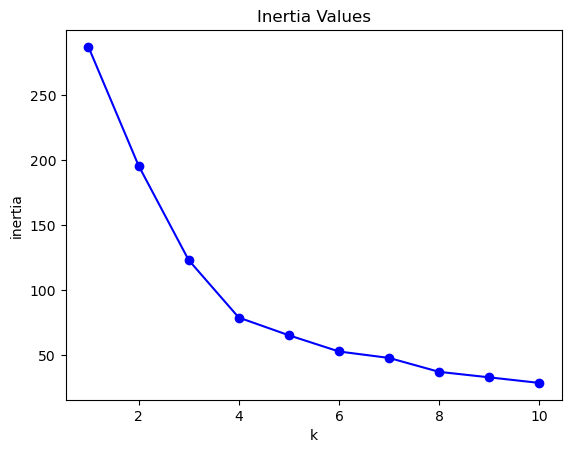

In [34]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
#Elbow_data_df.hvplot.line( x="k", y="inertia", title="Elbow Curve", xticks=k)
plt.plot(k, inertia, marker ='o', color='blue')
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Inertia Values")

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [35]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters =4, random_state =1)

In [36]:
# Fit the K-Means model using the scaled data
model.fit(scaled_market_df)

C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [37]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(scaled_market_df)

# Print the resulting array of cluster values.
print(clusters)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [38]:
# Create a copy of the DataFrame
scaled_market_df_predictions = scaled_market_df.copy()

In [39]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_df_predictions['clusters'] = clusters

# Display sample data
scaled_market_df_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [40]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scaled_market_df_predictions.hvplot.scatter(
   x="price_change_percentage_24h",
   y="price_change_percentage_7d",
    by = 'clusters',
    hover_cols=['coin_id'])

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [41]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

In [42]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca = pca.fit_transform(scaled_market_df_predictions)
# View the first five rows of the DataFrame. 
market_pca[0:5]

array([[-1.58513942,  0.13439444,  0.545621  ],
       [-1.32258066,  0.05449393,  1.11570854],
       [ 0.26633536, -0.53640937, -0.79694588],
       [ 0.25722513, -0.59201286, -0.6465287 ],
       [-2.95224985,  0.42237155,  1.26789353]])

In [43]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37005408, 0.32322221, 0.19115222])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer**: 88% of the total variance is in 3 PCA variables  

In [44]:
# Create a new DataFrame with the PCA data.
market_pca_df = pd.DataFrame(market_pca, columns =["PCA1", "PCA2","PCA3"])
# Creating a DataFrame with the PCA data
crypto_marker_df = pd.DataFrame(market_pca_df, columns = ["coin_id","PCA1", "PCA2","PCA3"])
# Copy the crypto names from the original data
crypto_marker_df["coin_id"] = scaled_market_df.index

# Set the coinid column as index
crypto_marker_df = crypto_marker_df.set_index("coin_id")

# Display sample data
crypto_marker_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894


---

### Find the Best Value for k Using the PCA Data

In [46]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [47]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(crypto_marker_df)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [48]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k, "inertia":inertia}
# Create a DataFrame with the data to plot the Elbow curve
Elbow_Curve2 = pd.DataFrame(elbow_data2)

In [49]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
Elbow_Curve2.hvplot.line( x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The curve is less curvy than using original data, making it easier to identify the k_value

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [50]:
# Initialize the K-Means model using the best value for k
model2 = KMeans(n_clusters =4, random_state =0)

In [51]:
# Fit the K-Means model using the PCA data
model2.fit(crypto_marker_df)

C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\briau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [52]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = model2.predict(crypto_marker_df)
# Print the resulting array of cluster values.
clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2])

In [53]:
# Create a copy of the DataFrame with the PCA data
crypto_marker_predictions_df = crypto_marker_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_marker_predictions_df['clusters'] = clusters

# Display sample data
crypto_marker_predictions_df.head()

,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-1.585139,0.134394,0.545621,0
ethereum,-1.322581,0.054494,1.115709,0
tether,0.266335,-0.536409,-0.796946,2
ripple,0.257225,-0.592013,-0.646529,2
bitcoin-cash,-2.952250,0.422372,1.267894,0


In [54]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_marker_predictions_df.hvplot.scatter(
   x="PCA1",
   y="PCA2",
    by = 'clusters',
    hover_cols=['coin_id'])

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [55]:
# Composite plot to contrast the Elbow curves

## not using PCA

Text(0.5, 1.0, 'Inertia Values')

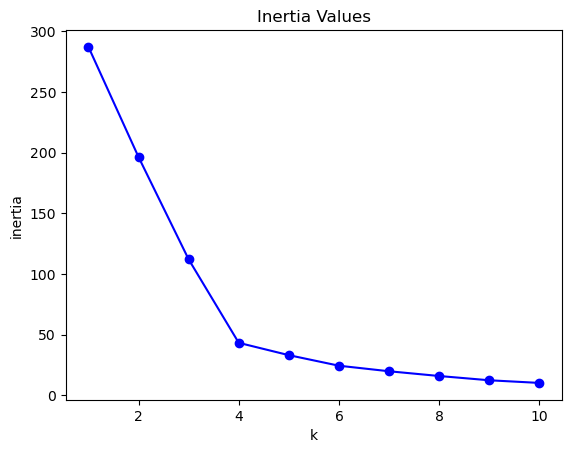

In [56]:
plt.plot(k, inertia, marker ='o', color='blue')
plt.xlabel("k")
plt.ylabel("inertia")
plt.title("Inertia Values")

## using PCA

In [57]:
Elbow_Curve2.hvplot.line( x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [59]:
# Saved pictures for resources folder 
plt.savefig('inertia_Values.png')


<Figure size 640x480 with 0 Axes>

In [58]:
# Composite plot to contrast the clusters

## not using PCA 

In [60]:

scaled_market_df_predictions.hvplot.scatter(
   x="price_change_percentage_24h",
   y="price_change_percentage_7d",
    by = 'clusters',
    hover_cols=['coin_id'])

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

## using PCA 

In [61]:
crypto_marker_predictions_df.hvplot.scatter(
   x="PCA1",
   y="PCA2",
    by = 'clusters',
    hover_cols=['coin_id'])

:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Clustering the data this way displays the possible outcomes in a easy to interpret visual.Outliers are easy to find. The lesser the data columns the easier it is to read as well.
  
  